In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_table('/Users/dongyang/Dropbox/Personal/Sharon/fcst5input.dat', )
df

,NYSEVOL,RTRR
0,5.86,NaN
1,7.02,NaN
2,10.11,NaN
3,10.56,NaN
4,6.61,NaN
...,...,...
1259,32192.90,NaN
1260,32367.80,NaN
1261,29986.64,NaN
1262,37017.11,NaN


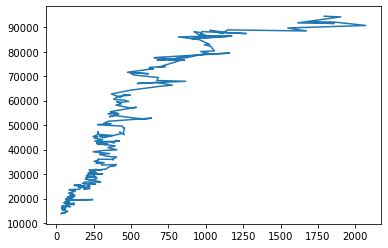

In [ ]:
plt.plot(df.iloc[500:1000, 0], df.iloc[500:1000, 1])

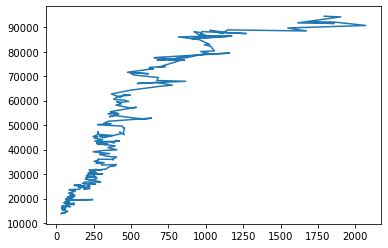

In [ ]:
plt.plot(df['NYSEVOL'][500:1000], df['RTRR'][500:1000])

# Inflation plot
Data source ```intro.csv```

In [ ]:
data_folder = './data/'
intro_data = pd.read_csv(data_folder + 'intro.csv', skipinitialspace=True, index_col='Date')
intro_data

,GDP,Inflation,Interest rate
Date,,,
1963-01-01,3.6,1.2,3.89
1963-04-01,3.8,1.0,3.96
1963-07-01,4.8,1.4,4.03
1963-10-01,5.2,1.4,4.12
1964-01-01,6.2,1.5,4.18
...,...,...,...
2019-07-01,2.1,1.8,1.80
2019-10-01,2.3,2.0,1.79
2020-01-01,0.3,2.1,1.37


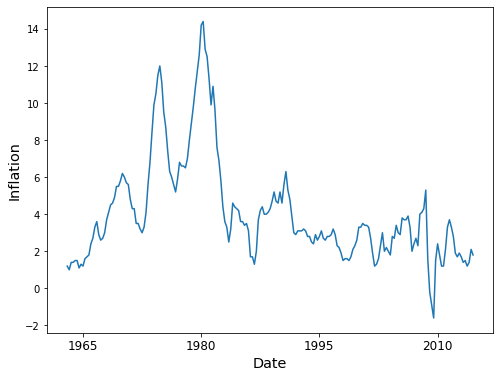

In [ ]:
# Inflation
fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(intro_data.loc['1963-01-01':'2014-07-01']['Inflation'])
ax.set_xticks(['1965-01-01', '1980-01-01', '1995-01-01', '2010-01-01'])
ax.set_xticklabels( ['1965', '1980', '1995', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Inflation', fontsize='x-large')

fig.savefig(data_folder+'Inflation.pdf', dpi = 300)

# GDP
Date source ```GDP.csv```

In [ ]:
gdp = pd.read_csv('./data/GDP.csv', index_col = 'DATE')
gdp

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2019-07-01,19141.744
2019-10-01,19253.959
2020-01-01,19010.848


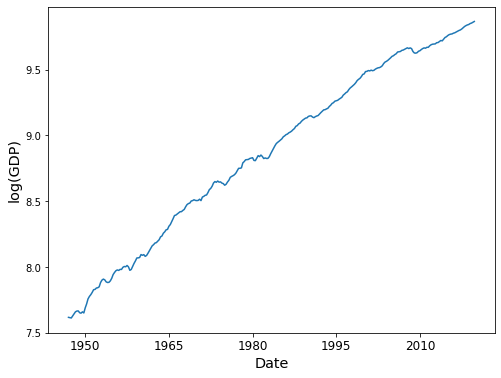

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(np.log(gdp.loc[:'2019-10-01']['GDPC1']))
ax.set_xticks(['1950-01-01','1965-01-01', '1980-01-01', '1995-01-01', '2010-01-01'])
ax.set_xticklabels( ['1950', '1965', '1980', '1995', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('log(GDP)', fontsize='x-large')

fig.savefig(data_folder+'GDP.pdf', dpi = 300)

# VIX
Data source ```VIX```

In [ ]:
pd.read_csv?

In [ ]:
vix = pd.read_csv('./data/VIX.csv', index_col = 'DATE', skipinitialspace=True, na_values='.')
vix

,VIXCLS
DATE,
2015-11-23,15.62
2015-11-24,15.93
2015-11-25,15.19
2015-11-26,NaN
2015-11-27,15.12
...,...
2021-01-11,24.08
2021-01-12,23.33
2021-01-13,22.21


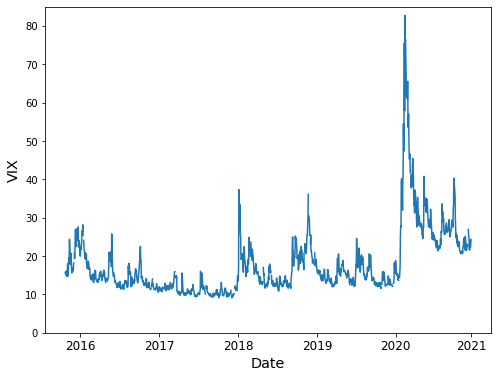

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(vix['VIXCLS'])
ax.set_xticks(['2016-02-01','2017-02-01', '2018-02-01', '2019-02-01', '2020-02-03', '2021-02-01'])
ax.set_xticklabels( ['2016', '2017', '2018', '2019', '2020', '2021'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('VIX', fontsize='x-large')
ax.set_ylim((0, 85))
fig.savefig(data_folder+'VIX.pdf', dpi = 300)

# Labor force - Linear trend
Data source ```laborforce.csv```

In [102]:
labor = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/laborforce.csv', index_col = 'DATE', skipinitialspace=True)
labor

,LNS11300002,LNS11300001
DATE,,
1948-01-01,32.0,86.7
1948-02-01,32.4,87.0
1948-03-01,32.1,86.3
1948-04-01,33.0,86.6
1948-05-01,32.0,86.1
...,...,...
2020-08-01,56.2,67.7
2020-09-01,55.6,67.6
2020-10-01,55.8,67.7


## Male labor trend

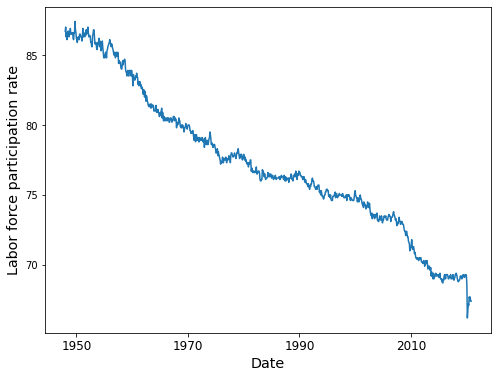

In [103]:
# Plotting the time series

ydata = labor['LNS11300001']

fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(ydata, label='male');
ax.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large');
ax.set_ylabel('Labor force participation rate', fontsize='x-large');

In [104]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
trend = np.arange(len(labor['LNS11300001']))

x_reg = add_constant(np.array([trend]).T,prepend=True)
result=sm.OLS(ydata,x_reg).fit()
result.model.data.xnames=['C', 'trend']
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            LNS11300001   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.378e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:01:30   Log-Likelihood:                -1210.9
No. Observations:                 876   AIC:                             2426.
Df Residuals:                     874   BIC:                             2435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C             85.9651      0.065   1319.298      0.0

### Fitting a linear trend

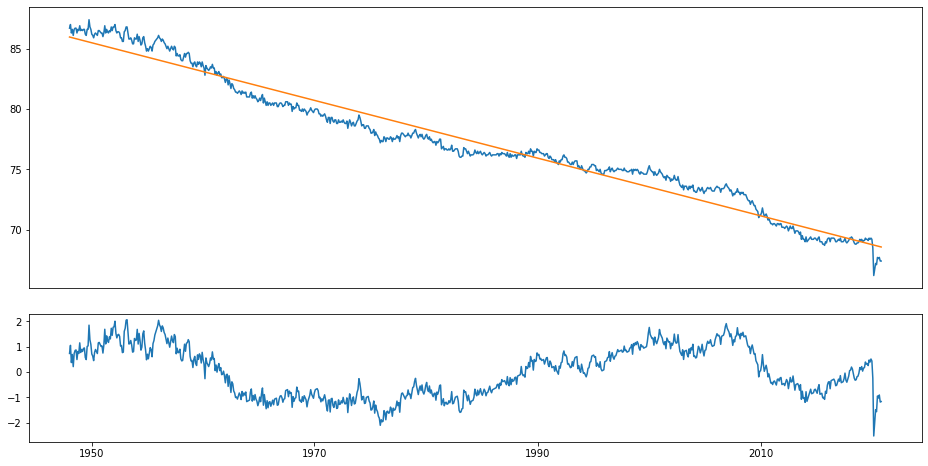

In [105]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
# f3_ax1.set_title('gs[0, :]')
ax2 = fig.add_subplot(gs[2], sharex=ax1)

# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(16,8))

# axs = np.ravel(axs)

y_fit=result.fittedvalues
residual=ydata-y_fit
ax1.plot(ydata)
ax1.plot(y_fit)

ax2.plot(residual,'-',label='Residual')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

# for ax in [ax1, ax2]:
#   ax.spines['top'].set_visible(False)
#   ax.spines['right'].set_visible(False)
plt.show()

## Female labor trend

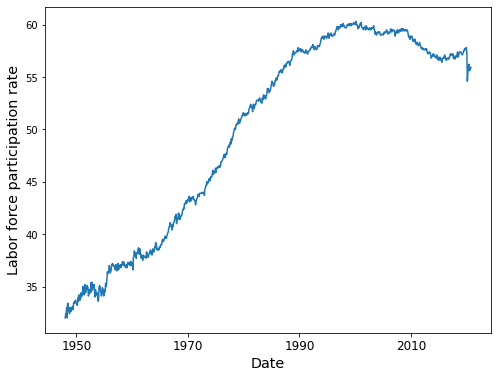

In [106]:
ydata = labor['LNS11300002']

fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.plot(ydata, label='female');
ax.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize='x-large');
ax.set_ylabel('Labor force participation rate', fontsize='x-large');

In [107]:
trend = np.arange(len(labor['LNS11300002']))

x_reg = add_constant(np.array([trend]).T,prepend=True)
result=sm.OLS(ydata,x_reg).fit()
result.model.data.xnames=['C', 'trend']
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            LNS11300002   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     5284.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:01:31   Log-Likelihood:                -2351.6
No. Observations:                 876   AIC:                             4707.
Df Residuals:                     874   BIC:                             4717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C             34.7213      0.240    144.908      0.0

### Fitting a linear trend

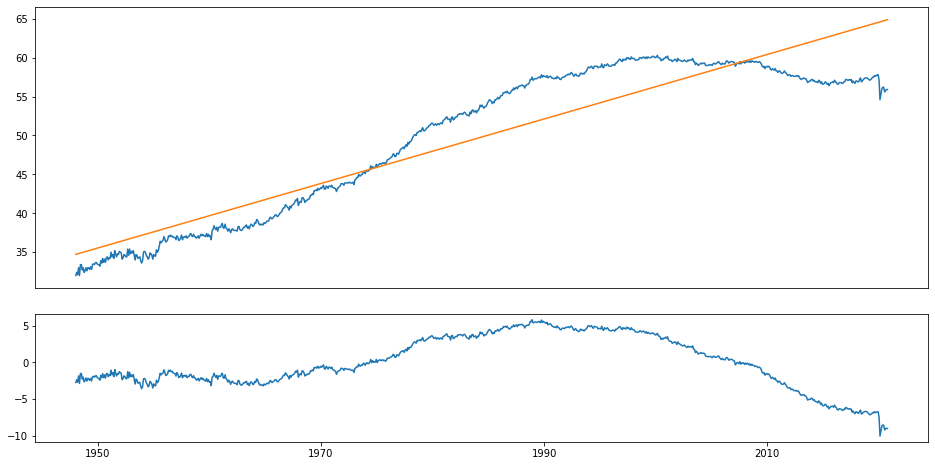

In [108]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
# f3_ax1.set_title('gs[0, :]')
ax2 = fig.add_subplot(gs[2], sharex=ax1)

# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(16,8))

# axs = np.ravel(axs)

y_fit=result.fittedvalues
residual=ydata-y_fit
ax1.plot(ydata)
ax1.plot(y_fit)

ax2.plot(residual,'-',label='Residual')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-02-01', '2010-02-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

plt.show()

# US GDP - Quadratic trend

In [98]:
gdp = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/GDP.csv', 
                  skipinitialspace=True, index_col='DATE')
gdp

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2019-07-01,19141.744
2019-10-01,19253.959
2020-01-01,19010.848


Text(0, 0.5, 'GDP')

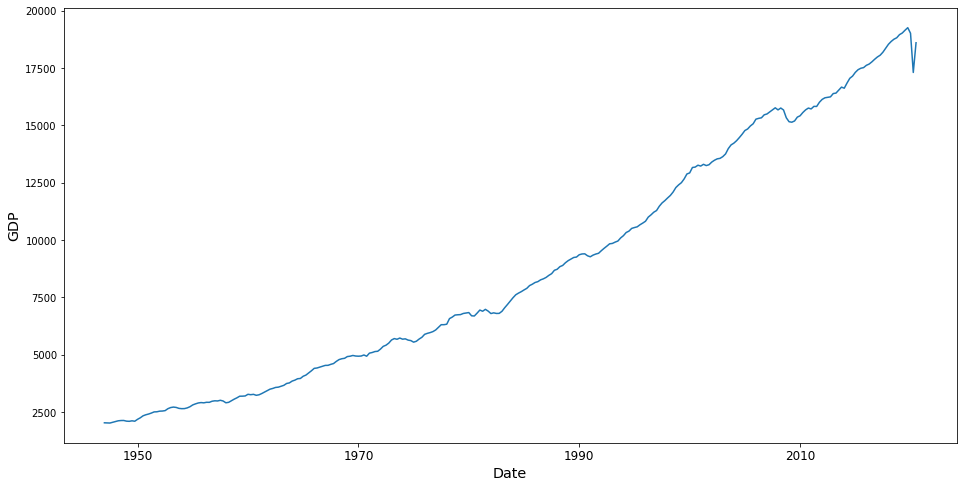

In [97]:
fig = plt.figure(figsize = (16, 8))
ax = fig.gca()
ax.plot(gdp)
ax.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax.set_xticklabels( ['1950', '1970', '1990', '2010'], fontsize='large')
ax.set_xlabel('Date', fontsize = 'x-large')
ax.set_ylabel('GDP', fontsize = 'x-large')

In [114]:
gdp['const'] = 1
gdp['trend'] = np.arange(len(gdp['GDPC1']))
gdp['trend2'] = gdp['trend']**2
Y = ['GDPC1']
X = ['const', 'trend', 'trend2']

result=sm.OLS(gdp[Y],gdp[X], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPC1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.033e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:07:47   Log-Likelihood:                -2155.7
No. Observations:                 295   AIC:                             4317.
Df Residuals:                     292   BIC:                             4329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1947.6962     62.933     30.949      0.0

### fitting a quadratic trend

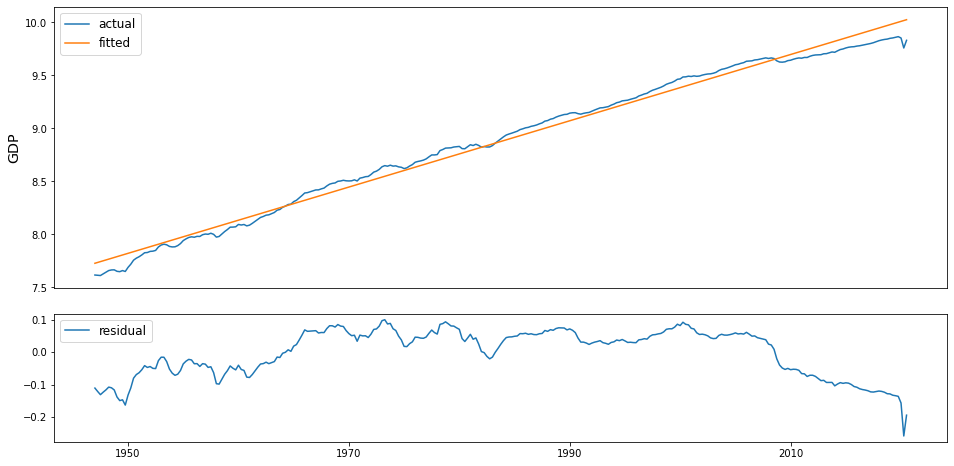

In [131]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
# f3_ax1.set_title('gs[0, :]')
ax2 = fig.add_subplot(gs[2], sharex=ax1)

# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(16,8))

# axs = np.ravel(axs)
ydata = gdp[Y]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-',label='residual')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('GDP', fontsize = 'x-large')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

# for ax in [ax1, ax2]:
#   ax.spines['top'].set_visible(False)
#   ax.spines['right'].set_visible(False)
plt.show()

# GDP - Exponential trend

In [124]:
gdp['const'] = 1
gdp['trend'] = np.arange(len(gdp['GDPC1']))
gdp['trend2'] = gdp['trend']**2
gdp['logGDP'] = np.log(gdp['GDPC1'])
Y = ['logGDP']
X = ['const', 'trend']

result=sm.OLS(gdp[Y],gdp[X], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 logGDP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.573e+04
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          1.68e-287
Time:                        19:13:43   Log-Likelihood:                 361.68
No. Observations:                 295   AIC:                            -719.4
Df Residuals:                     293   BIC:                            -712.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7281      0.008    933.840      0.0

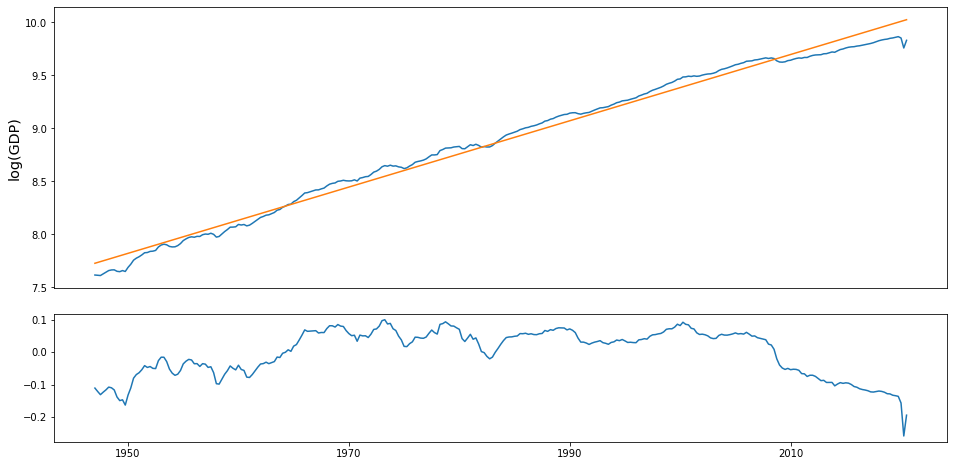

In [127]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
# f3_ax1.set_title('gs[0, :]')
ax2 = fig.add_subplot(gs[2], sharex=ax1)

# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(16,8))

# axs = np.ravel(axs)
ydata = gdp[Y]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit
ax1.plot(ydata)
ax1.plot(y_fit)

ax2.plot(residual,'-',label='Residual')

ax1.set_xticks(['1950-01-01','1970-01-01', '1990-01-01', '2010-01-01'])
ax1.set_xticklabels(['1950', '1970', '1990', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('log(GDP)', fontsize='x-large')
# for ax in [ax1, ax2]:
#   ax.spines['top'].set_visible(False)
#   ax.spines['right'].set_visible(False)
plt.show()

# Applications - forecasting retail sales

In [ ]:
pd.read_table('/Users/dongyang/Dropbox/Personal/Sharon/fcst5input.dat',649